<a href="https://colab.research.google.com/github/flaviolima/ncf-recommendation-system/blob/main/SRDeepLearningBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate dataset

In [ ]:
import pandas as pd
import numpy as np

from numpy.random import default_rng
from numpy import random

import random
import time
from datetime import datetime

def randomDate(start, end):
    frmt = '%d-%m-%Y %H:%M:%S'

    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))

    ptime = stime + random.random() * (etime - stime)
    dt = datetime.fromtimestamp(time.mktime(time.localtime(ptime)))
    return dt

def make_students(num):
    
    #'1 - Blindness'
    #'2 - Low vision'
    #'3 - Deaf and hard of hearing',
    #'4 - Cognitive, language, learning disabilities'
    #'5 - Physical disabilities']

    feedback_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
    team_list = np.arange(start=1, stop=7121)

    content_list = np.arange(start=1, stop=54000)

    fake_students = [{'userId': np.random.choice(team_list),
                  'rating':np.random.choice(feedback_list),
                  'timestamp': randomDate("20-01-2018 13:30:00", "23-01-2022 04:50:34"),
                  'contentId':np.random.choice(content_list)} for x in range(num)]
        
    return fake_students

df = pd.DataFrame(make_students(num=1000000)) ## define range 500k, 1m, 2m
#student_df.sort_values(by=['userId'], inplace=True)
#student_df.sort_values(by=['contentId'], inplace=True)

student_df = df.sort_values(['userId', 'contentId'], ascending = [True, True])

#student_df.head(1000)

#student_group_df = student_df.groupby("userId")["contentId"].count()
#student_group_df.head(7000)

# count feedback 
#print(student_df["userId"].value_counts())

# count disability 
#print(student_df["rating"].value_counts())

#group data by product and display sales as line chart
#student_df.groupby('userId')['contentId'].plot(legend=True)

# generate csv
student_df.to_csv('100k_ds.csv', index_label=False, encoding='utf-8')
#student_group_df.to_csv('teste_dataset_grouped.csv', encoding='utf-8') 


# Data processing

In [ ]:
# https://towardsdatascience.com/deep-learning-based-recommender-systems-3d120201db7e
import pandas as pd
import numpy as np
np.random.seed(123)

ratings = pd.read_csv('1m_ds7.csv', error_bad_lines=False, parse_dates=['timestamp'])

rand_userIds = np.random.choice(ratings['userId'].unique(), 
                                size=int(len(ratings['userId'].unique())*0.5), # 30%
                                #size=int(len(ratings['userId'].unique())),
                                replace=False)

ratings = ratings.loc[ratings['userId'].isin(rand_userIds)]

print(ratings) 


        userId  contentId  rating           timestamp
4         1436          1     5.0 2021-10-17 13:44:00
5         1482          1     3.5 2020-01-21 19:57:00
9         3354          1     2.0 2021-02-15 10:34:00
10        4123          1     5.0 2020-01-25 07:24:00
11        4323          1     5.0 2021-08-17 03:19:00
...        ...        ...     ...                 ...
999987    3975      59037     4.5 2018-02-17 18:46:00
999989    6172      59037     4.0 2020-01-03 19:55:00
999990    6951      59044     3.0 2021-10-11 14:43:00
999995    4004      59103     4.0 2018-09-06 13:51:00
999998    6147      59103     3.5 2020-08-22 22:47:00

[500368 rows x 4 columns]


# Dataset users and items



In [ ]:
import matplotlib.pylab as plt
import scipy.sparse as sparse

def read_data():
    names = ['userId', 'contentId', 'rating', 'timestamp']
    num_users = ratings.userId.unique().shape[0]
    num_items = ratings.contentId.unique().shape[0]
    return ratings, num_users, num_items

sparsity = 1 - len(ratings) / (num_users * num_items)
print(f'number of users: {num_users}, number of items: {num_items}')
print(f'matrix sparsity: {sparsity:f}')
print(ratings.head(1000))

A = sparse.random(num_users, num_items, density=sparsity)
plt.spy(A, markersize=1)


NameError: ignored

# Distribution of Ratings in dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


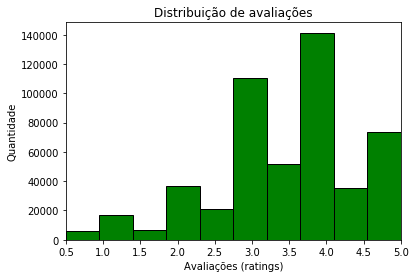

In [ ]:
!pip install d2l==0.17.5
!pip install matplotlib==3.1.3
!pip install mxnet

import os
import pandas as pd
from d2l import mxnet as d2l

d2l.plt.hist(ratings['rating'], ec='black', bins=10, color='green')
d2l.plt.xlabel('Avaliações (ratings)')
d2l.plt.xlim(xmin=0.5, xmax=5)
d2l.plt.ylabel('Quantidade')
d2l.plt.title('Distribuição de avaliações')
d2l.plt.show()

# Train-test split

In [ ]:
ratings['rank_latest'] = ratings.groupby(['userId'])['timestamp'].rank(method='first', ascending=False)

train_ratings = ratings[ratings['rank_latest'] != 1]
test_ratings = ratings[ratings['rank_latest'] == 1]

# exclui colunas que não serão utilizadas
train_ratings = train_ratings[['userId', 'contentId', 'rating']]
test_ratings = test_ratings[['userId', 'contentId', 'rating']]

print('Train')
print(train_ratings)
print('--------------------------------------------------------------')
print('Test')
print(test_ratings)

train_ratings.loc[:, 'rating'] = 1

# busca uma lista de contentIDs
all_contentIds = ratings['contentId'].unique()

# variáveis revervadas para serem utilizadas no treinamento
users, items, labels = [], [], []

# conjunto de itens que o usuário interagiu
user_item_set = set(zip(train_ratings['userId'], train_ratings['contentId']))

# proporção de amostras negativas para positivas (4:1)
num_negatives = 4

for (u, i) in user_item_set:
    users.append(u)
    items.append(i)
    labels.append(1) # itens que o usuário interagiu, marca como positivo (1)
    for _ in range(num_negatives):
        # seleciona um item randomicamente
        negative_item = np.random.choice(all_contentIds) 
        # verifica se o usuário não interagiu com este item
        while (u, negative_item) in user_item_set:
            negative_item = np.random.choice(all_contentIds)
        users.append(u)
        items.append(negative_item)
        labels.append(0) # itens que não tiveram interação são negativos

Train
        userId  contentId  rating
4         1436          1     5.0
5         1482          1     3.5
9         3354          1     2.0
10        4123          1     5.0
11        4323          1     5.0
...        ...        ...     ...
999987    3975      59037     4.5
999989    6172      59037     4.0
999990    6951      59044     3.0
999995    4004      59103     4.0
999998    6147      59103     3.5

[496808 rows x 3 columns]
--------------------------------------------------------------
Test
        userId  contentId  rating
211       1433          1     5.0
237       3589          1     4.5
410        708          1     3.0
1405      3069          1     4.0
1592      4871          1     5.0
...        ...        ...     ...
998381    2327      58559     3.5
998500    1609      58559     1.0
999198    5185      58559     3.0
999628    2674      58975     4.0
999917     489      59022     3.0

[3560 rows x 3 columns]


# Pytorch dataset input

In [ ]:

import torch
from torch.utils.data import Dataset

class FeedbacksTrainDataset(Dataset):
    """FeedbacksTrainDataset PyTorch para treinamento
    
    Args:
        ratings (pd.DataFrame): Dataframe contendo os ratings
        all_contentIds (list): Lista de todos contentIds
    
    """

    def __init__(self, ratings, all_contentIds):
        self.users, self.items, self.labels = self.get_dataset(ratings, all_contentIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, ratings, all_contentIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(ratings['userId'], ratings['contentId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_contentIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_contentIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

# Build NCF

In [ ]:
!pip install torchtext==0.8.0 torch==1.10.0 pytorch-lightning==1.2.2

import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader

class NCF(pl.LightningModule):
    """ Neural Collaborative Filtering (NCF)
    
        Args:
            num_users (int)
            num_items (int)
            ratings (pd.DataFrame)
            all_contentIds (list): (train + test)
    """
    
    def __init__(self, num_users, num_items, ratings, all_contentIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.ratings = ratings
        self.all_contentIds = all_contentIds
        
    def forward(self, user_input, item_input):
        
        # embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # concatenação das duas embedding layers (user, item)
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(FeedbacksTrainDataset(self.ratings, self.all_contentIds),
                          batch_size=512, num_workers=4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Train NCF


In [ ]:
num_users = ratings['userId'].max()+1
num_items = ratings['contentId'].max()+1
all_contentIds = ratings['contentId'].unique()

model = NCF(num_users, num_items, train_ratings, all_contentIds)

trainer = pl.Trainer(max_epochs=5, gpus=1, reload_dataloaders_every_epoch=True,
                     progress_bar_refresh_rate=50, logger=False, checkpoint_callback=False)

trainer.fit(model)

GPU available: True, used: True
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
TPU available: None, using: 0 TPU cores

  | Name           | Type      | Params
---------------------------------------------
0 | user_embedding | Embedding | 57.0 K
1 | item_embedding | Embedding | 472 K 
2 | fc1            | Linear    | 1.1 K 
3 | fc2            | Linear    | 2.1 K 
4 | output         | Linear    | 33    
---------------------------------------------
533 K     Trainable params
0         Non-trainable params
533 K     Total params
2.132     Total estimated model params size (MB)

  | Name           | Type      | Params
---------------------------------------------
0 | user_embedding | Embedding | 57.0 K
1 | item_embedding | Embedding | 472 K 
2 | fc1            | Linear    | 1.1 K 
3 | fc2            | Linear    | 2.1 K 
4 | output         | Linear    | 33    
---------------------------------------------
533 K     Trainable params
0         Non-trainable params
53

Training: 0it [00:00, ?it/s]

1

# Evaluate

In [ ]:
# pares user-item para teste
test_user_item_set = set(zip(test_ratings['userId'], test_ratings['contentId']))

# seleção de todos os itens que cada usuário interagiu
user_interacted_items = ratings.groupby('userId')['contentId'].apply(list).to_dict()

hits = []
for (u,i) in test_user_item_set:
    interacted_items = user_interacted_items[u]
    not_interacted_items = set(all_contentIds) - set(interacted_items)
    selected_not_interacted = list(np.random.choice(list(not_interacted_items), 99))
    test_items = selected_not_interacted + [i]
    
    predicted_labels = np.squeeze(model(torch.tensor([u]*100), 
                                        torch.tensor(test_items)).detach().numpy())
    
    top10_items = [test_items[i] for i in np.argsort(predicted_labels)[::-1][0:10].tolist()]
    
    if i in top10_items:
        hits.append(1)
    else:
        hits.append(0)

# saída da avaliação: média da probabilidade do conteúdo recomendado estar adequado para o usuário       
print("Hit Ratio @ 10 = {:.2f}".format(np.average(hits)))
print(top10_items)


Hit Ratio @ 10 = 0.68
[185, 165, 586, 112, 2076, 1175, 1566, 1965, 540, 351]
